In [0]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from sklearn.metrics import max_error
import math
import numpy as np
from sklearn import linear_model

In [0]:
data = pd.read_csv('https://covid19.isciii.es/resources/serie_historica_acumulados.csv', header= 0, encoding= 'unicode_escape')
#geo data CCAA
dfCCAA = pd.read_csv('https://raw.githubusercontent.com/raulgm18/geodata/master/CCAA.csv', header= 0)

In [0]:
#data format spain
pd.DataFrame(data)
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%d/%m/%Y')
dataCCAA = data.drop(data[data['CCAA'].map(len) > 2].index)

In [0]:
#geo data CCAA
dfg = pd.merge(left=dataCCAA, right=dfCCAA, how='left', left_on='CCAA', right_on='CCAA')
dfg.info()

In [0]:
#Splitting the dataset
regional_df_list = []
rolling_average_days = 7
for region, data_region_subset in dfg.groupby('CCAA'):
    data_region = data_region_subset.copy()
    data_region['new_deaths_av'] = data_region['PCR+'].diff().mask(data_region['PCR+'].diff().lt(0),0).rolling(window=rolling_average_days).mean()
    data_region['new_icare_av'] = data_region['UCI'].diff().mask(data_region['UCI'].diff().lt(0),0).rolling(window=rolling_average_days).mean()
    data_region['severe_deaths'] = data_region['new_deaths_av'] + data_region['new_icare_av']
    regional_df_list.append(data_region)

In [0]:
#Defining algebraic functions
def n_to_date(n):
    # it converts a number to a date, considering starting from peak_date_integer
    return (peak_date_dateformat + timedelta(days=n - peak_date_integer)).strftime('%d/%m/%Y')
def build_line(x1, y1, x2, y2):
    m = float(y2 - y1) / (x2 - x1)
    q = y1 - (m * x1)
    return [m, q]

In [0]:
def calculate_date_zero(linear_regr):
    date_zero_integer = round(- linear_regr.intercept_ / linear_regr.coef_[0])
    date_zero_datetime = n_to_date(date_zero_integer)
    today = datetime.today()
    future = peak_date_dateformat + timedelta(days=date_zero_integer - peak_date_integer)
    remaining_days = (future - today).days
    line_max = build_line(X_test[0][0], y_pred_max[0], X_test[1][0], y_pred_max[1])
    date_zero_max = math.ceil(- line_max[1] / line_max[0])
    date_zero_max = n_to_date(date_zero_max)
    line_min = build_line(X_test[0][0], y_pred_min[0], X_test[1][0], y_pred_min[1])
    date_zero_min = math.floor(- line_min[1] / line_min[0])
    date_zero_min = n_to_date(date_zero_min)
    return date_zero_datetime, date_zero_max, date_zero_min, remaining_days

Creating model for Andalucía
Score : 0.8438559578211898
Andalucía Zero intensive cares and deaths expected between 21/05/2020 and 24/04/2020
Creating model for Aragón
Score : 0.882931442767375


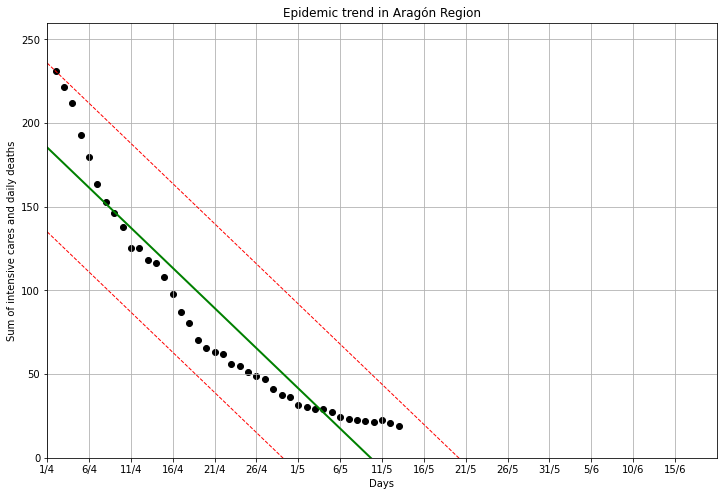

Aragón Zero intensive cares and deaths expected between 21/05/2020 and 29/04/2020
Creating model for Asturias, Principado de
Score : 0.8682769813472189


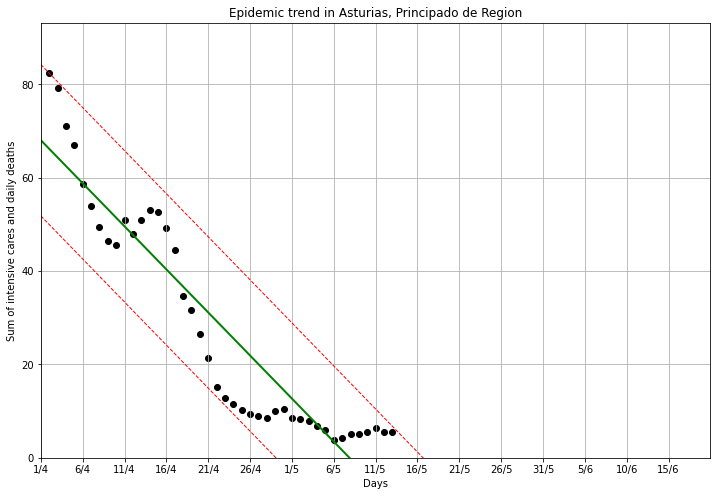

Asturias, Principado de Zero intensive cares and deaths expected between 17/05/2020 and 29/04/2020
Creating model for Cantabria
Score : 0.9415166243088654


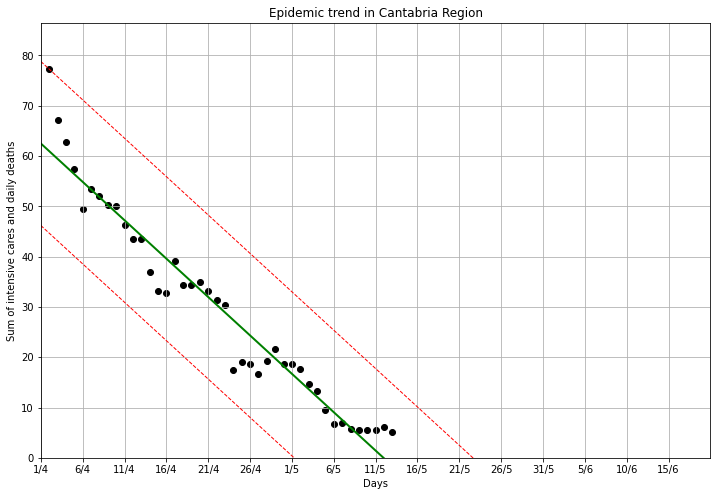

Cantabria Zero intensive cares and deaths expected between 23/05/2020 and 01/05/2020
Creating model for Ceuta
Score : 0.4797190400641238
Ceuta Zero intensive cares and deaths expected between 07/06/2020 and 04/04/2020
Creating model for Castilla y León
Score : 0.8718615914742907


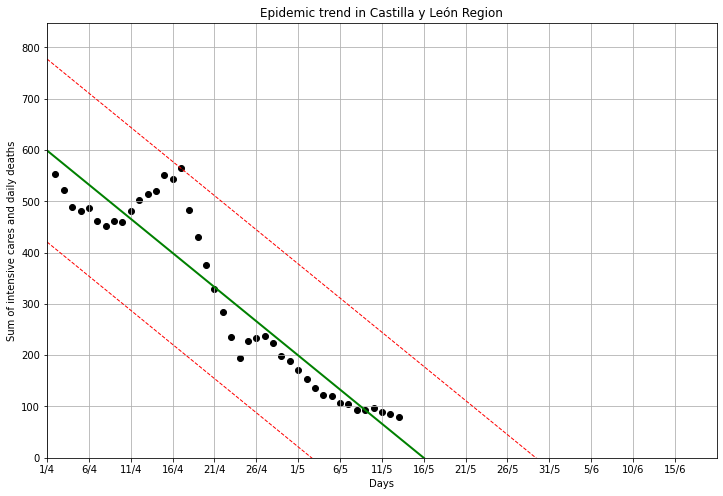

Castilla y León Zero intensive cares and deaths expected between 30/05/2020 and 02/05/2020
Creating model for Castilla - La Mancha
Score : 0.9229869869125212


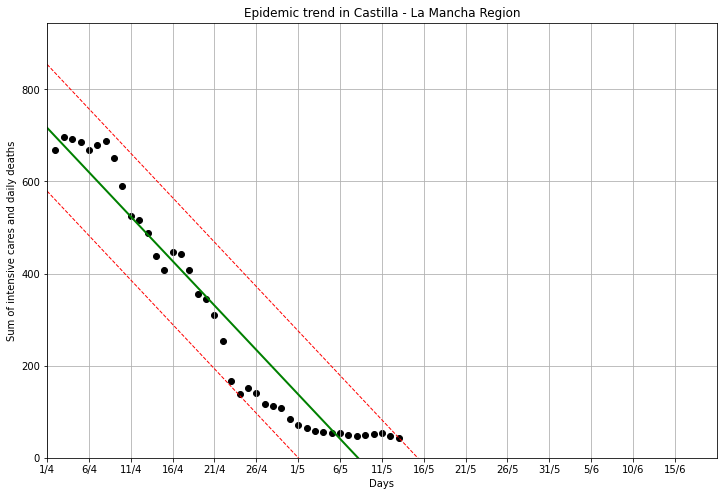

Castilla - La Mancha Zero intensive cares and deaths expected between 16/05/2020 and 01/05/2020
Creating model for Canarias
Score : 0.8122016839234447
Canarias Zero intensive cares and deaths expected between 25/05/2020 and 20/04/2020
Creating model for Cataluña
Score : 0.8371487616731466
Cataluña Zero intensive cares and deaths expected between 05/06/2020 and 14/05/2020
Creating model for Extremadura
Score : 0.7805884283685836
Extremadura Zero intensive cares and deaths expected between 21/05/2020 and 26/04/2020
Creating model for Galicia
Score : 0.8209489003244312
Galicia Zero intensive cares and deaths expected between 26/05/2020 and 28/04/2020
Creating model for Balears, Illes
Score : 0.8753063923697053


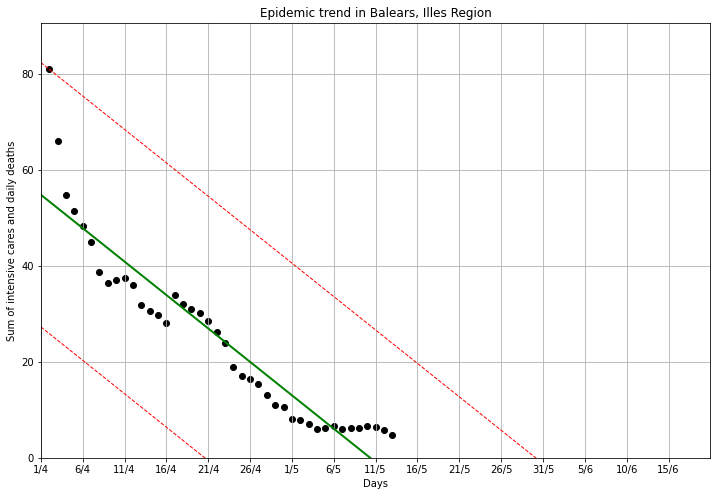

Balears, Illes Zero intensive cares and deaths expected between 31/05/2020 and 20/04/2020
Creating model for Murcia, Región de
Score : 0.7121680980895193
Murcia, Región de Zero intensive cares and deaths expected between 26/05/2020 and 15/04/2020
Creating model for Madrid, Comunidad de
Score : 0.8702536532572669


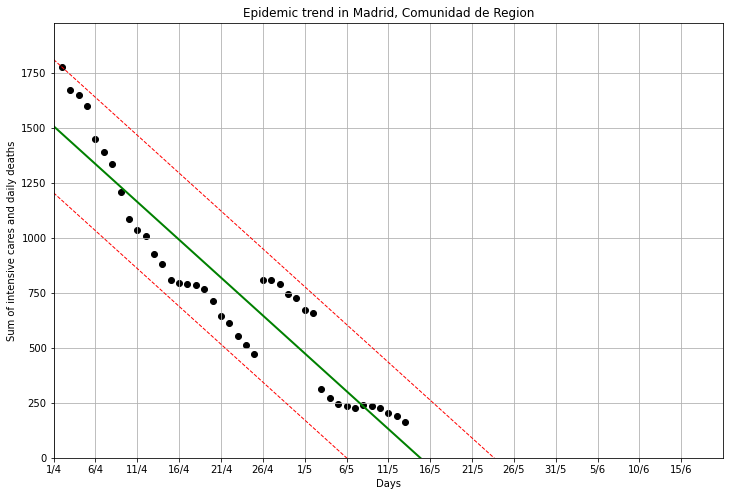

Madrid, Comunidad de Zero intensive cares and deaths expected between 24/05/2020 and 05/05/2020
Creating model for Melilla
Score : 0.6549885783897076
Melilla Zero intensive cares and deaths expected between 28/05/2020 and 18/04/2020
Creating model for Navarra, Comunidad Foral de
Score : 0.9026638940930739


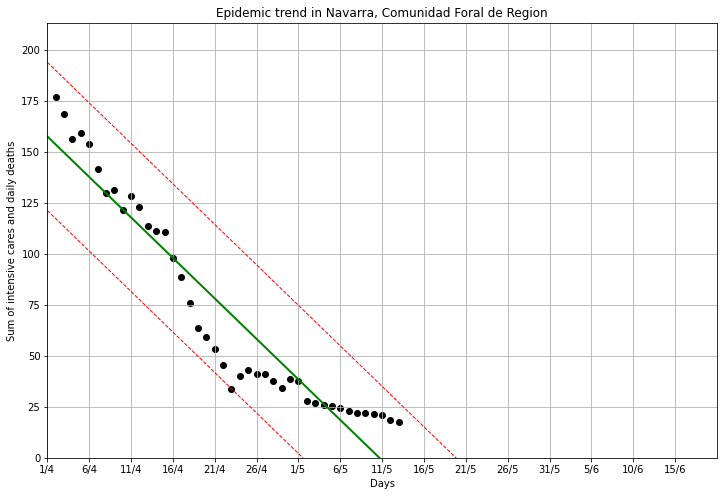

Navarra, Comunidad Foral de Zero intensive cares and deaths expected between 20/05/2020 and 01/05/2020
Creating model for País Vasco
Score : 0.909079087556613


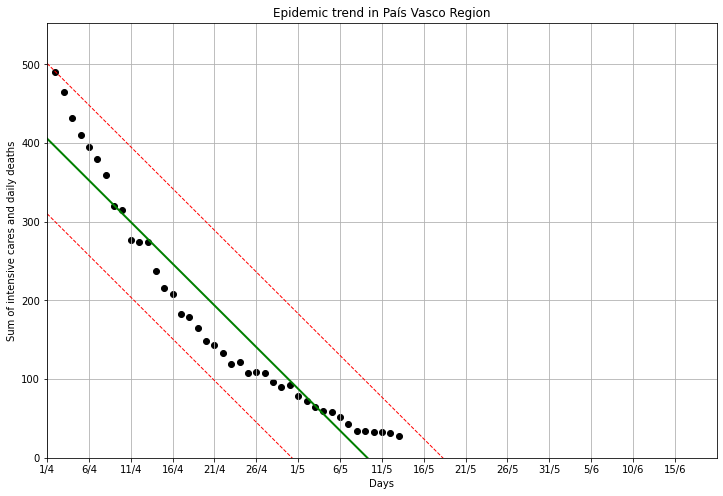

País Vasco Zero intensive cares and deaths expected between 19/05/2020 and 30/04/2020
Creating model for Rioja, La
Score : 0.8850264341170064


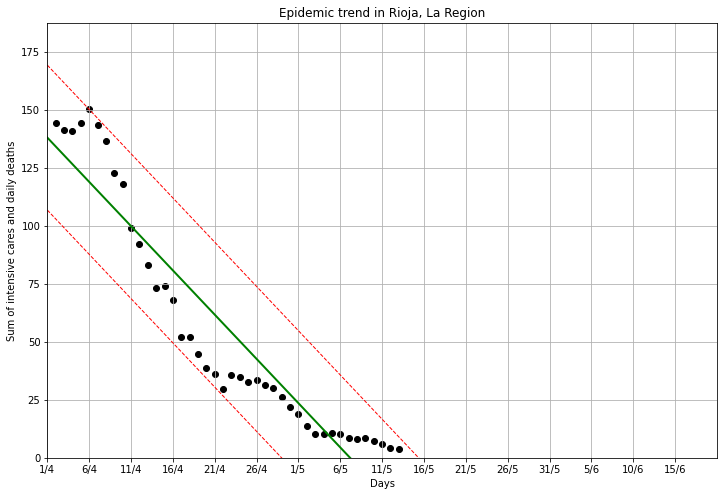

Rioja, La Zero intensive cares and deaths expected between 16/05/2020 and 28/04/2020
Creating model for Comunitat Valenciana
Score : 0.8350984527125633
Comunitat Valenciana Zero intensive cares and deaths expected between 24/05/2020 and 24/04/2020


In [40]:
#Build and train models
model_score_threshold = 0.85
model_outputs_df = pd.DataFrame()
for data in regional_df_list:
    date = data['FECHA']
    region_name = data["NOMBRE_CODE"].iloc[0]
    region_code = data["INE_CCAA"].iloc[0]
    print("Creating model for " + region_name)
    date_format = date
    # Creating Linear Regression Model
    linear_regr = linear_model.LinearRegression()
    # Preparing the lists with past data, that we will use for training the model
    X = date_format
    y = data['severe_deaths'].tolist()[1:]
    # date format is not suitable for modeling, let's transform the date into incrementals number starting from April 1st
    peak_date_integer = 41  # April 1st is the 41st day of the series
    day_numbers = []
    for i in range(1, len(X)):
        day_numbers.append([i])
    X = day_numbers
    # Extracting data after the peak, that we will use for training the model
    X = X[peak_date_integer:]
    y = y[peak_date_integer:]
    # Train the model using the training sets
    linear_regr.fit(X, y)
    model_score = linear_regr.score(X, y)
    print("Score : %s" % (model_score))

    # Predict future trend
    y_pred = linear_regr.predict(X)
    error = max_error(y, y_pred)
    error
    X_test = []
    future_days = 80
    for i in range(peak_date_integer, peak_date_integer + future_days):
        X_test.append([i])
    y_pred_linear = linear_regr.predict(X_test)
    y_pred_max = []
    y_pred_min = []
    for i in range(0, len(y_pred_linear)):
        y_pred_max.append(y_pred_linear[i] + error)
        y_pred_min.append(y_pred_linear[i] - error)

    # convert date 0 into datetime format
    peak_date_dateformat = (data['FECHA'].iloc[peak_date_integer])
    # date forecast
    date_prev = []
    x_ticks = []
    step = 5
    data_curr = peak_date_dateformat
    x_current = peak_date_integer
    n = int(future_days / step)
    for i in range(0, n):
        date_prev.append(str(data_curr.day) + "/" + str(data_curr.month))
        x_ticks.append(x_current)
        data_curr = data_curr + timedelta(days=step)
        x_current = x_current + step

    if model_score >= model_score_threshold: 
        plt.title("Epidemic trend in %s Region" % region_name)
        # adjust plot size
        F = plt.gcf()
        Size = F.get_size_inches()
        F.set_size_inches(Size[0] * 2, Size[1] * 2, forward=True)
        # plot known data
        plt.scatter(X, y, color='black')
        # plot linear regression prediction
        plt.plot(X_test, y_pred_linear, color='green', linewidth=2)
        # plot maximum error
        plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed')
        # plot minimum error
        plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
        plt.xlabel('Days')
        plt.xlim(peak_date_integer, peak_date_integer + future_days)
        plt.ylim(bottom=0)
        plt.xticks(x_ticks, date_prev)
        plt.ylabel('Sum of intensive cares and daily deaths')
        # plt.yscale("log")
        # add grid
        plt.grid()
        plt.savefig("prediction.png")
        plt.show()


    date_zero_datetime, date_zero_max, date_zero_min, remaining_days = calculate_date_zero(linear_regr)
    print("%s Zero intensive cares and deaths expected between %s and %s" % (region_name, date_zero_max, date_zero_min))

    temp = pd.DataFrame(
        {
            'region_name': region_name,
            'COD_REG': int(region_code),
            'remaining_days': remaining_days,
            'date_zero': date_zero_datetime,
            'date_zero_max': date_zero_max,
            'date_zero_min': date_zero_min,
            'model_score': model_score
        }, index=[region_code]
    )

    model_outputs_df = pd.concat([model_outputs_df, temp])


In [41]:
pd.set_option('display.width', 1000)
print(model_outputs_df)


                    region_name  COD_REG  ...  date_zero_min model_score
1                     Andalucía        1  ...     24/04/2020    0.843856
2                        Aragón        2  ...     29/04/2020    0.882931
3       Asturias, Principado de        3  ...     29/04/2020    0.868277
6                     Cantabria        6  ...     01/05/2020    0.941517
18                        Ceuta       18  ...     04/04/2020    0.479719
7               Castilla y León        7  ...     02/05/2020    0.871862
8          Castilla - La Mancha        8  ...     01/05/2020    0.922987
5                      Canarias        5  ...     20/04/2020    0.812202
9                      Cataluña        9  ...     14/05/2020    0.837149
11                  Extremadura       11  ...     26/04/2020    0.780588
12                      Galicia       12  ...     28/04/2020    0.820949
4                Balears, Illes        4  ...     20/04/2020    0.875306
14            Murcia, Región de       14  ...     1

In [0]:
##latest data to regions
dfLast = dfg.sort_values(by='FECHA').drop_duplicates(subset=['CCAA'], keep='last')
model_outputs_with_latest_data = pd.merge(left=dfLast, right=model_outputs_df, how='left', left_on='INE_CCAA', right_on='COD_REG')

#exporting dataframe to csv
today = datetime.today()
model_outputs_with_latest_data.to_csv('model_outputs_%s%02d%s.csv' % (today.year, today.month, today.day))

In [43]:
model_outputs_with_latest_data

,CCAA,FECHA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,Nombre,Lat,Long,NOMBRE_CODE,INE_CCAA,Población,region_name,COD_REG,remaining_days,date_zero,date_zero_max,date_zero_min,model_score
0,EX,2020-05-13,NaN,2923.0,1001.0,1761.0,109.0,492.0,2482.0,Extremadura,"39,4937392","-6,0679194",Extremadura,11,1.067.710,Extremadura,11,-6,09/05/2020,21/05/2020,26/04/2020,0.780588
1,GA,2020-05-13,NaN,9317.0,1515.0,2915.0,327.0,601.0,8157.0,Galicia,"42,5750554","-8,1338558",Galicia,12,2.699.499,Galicia,12,-3,12/05/2020,26/05/2020,28/04/2020,0.820949
2,NC,2020-05-13,NaN,5105.0,2786.0,2045.0,135.0,498.0,3400.0,Navarra,"42,6953909","-1,6760691","Navarra, Comunidad Foral de",15,654.214,"Navarra, Comunidad Foral de",15,-4,11/05/2020,20/05/2020,01/05/2020,0.902664
3,ML,2020-05-13,NaN,119.0,13.0,44.0,3.0,2.0,119.0,Melilla,"35,2922775","-2,9380973",Melilla,19,86.487,Melilla,19,-7,08/05/2020,28/05/2020,18/04/2020,0.654989
4,MC,2020-05-13,NaN,1532.0,905.0,672.0,112.0,142.0,1998.0,Murcia,"37,9922399","-1,1306544","Murcia, Región de",14,1.493.898,"Murcia, Región de",14,-9,06/05/2020,26/05/2020,15/04/2020,0.712168
5,VC,2020-05-13,NaN,10784.0,3370.0,5389.0,717.0,1349.0,9490.0,C. Valenciana,"39,4840108","-0,7532809",Comunitat Valenciana,10,5.003.769,Comunitat Valenciana,10,-6,09/05/2020,24/05/2020,24/04/2020,0.835098
6,MD,2020-05-13,NaN,65693.0,4958.0,41962.0,3564.0,8779.0,40199.0,Madrid,"40,4167754","-3,7037902","Madrid, Comunidad de",13,6.663.394,"Madrid, Comunidad de",13,0,15/05/2020,24/05/2020,05/05/2020,0.870254
7,CE,2020-05-13,NaN,116.0,59.0,11.0,4.0,4.0,159.0,Ceuta,"35,8893874","-5,3213455",Ceuta,18,84.777,Ceuta,18,-9,06/05/2020,07/06/2020,04/04/2020,0.479719
8,CN,2020-05-13,NaN,2275.0,0.0,937.0,178.0,151.0,1496.0,Canarias,"28,2915637","-16,6291304",Canarias,5,2.153.389,Canarias,5,-7,08/05/2020,25/05/2020,20/04/2020,0.812202
9,CL,2020-05-13,NaN,18173.0,6206.0,8560.0,548.0,1925.0,7621.0,Castilla y León,"41,8356821","-4,3976357",Castilla y León,7,2.399.548,Castilla y León,7,1,16/05/2020,30/05/2020,02/05/2020,0.871862


In [44]:
!pip install --upgrade geopandas
!pip install mapclassify


Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.7.0)


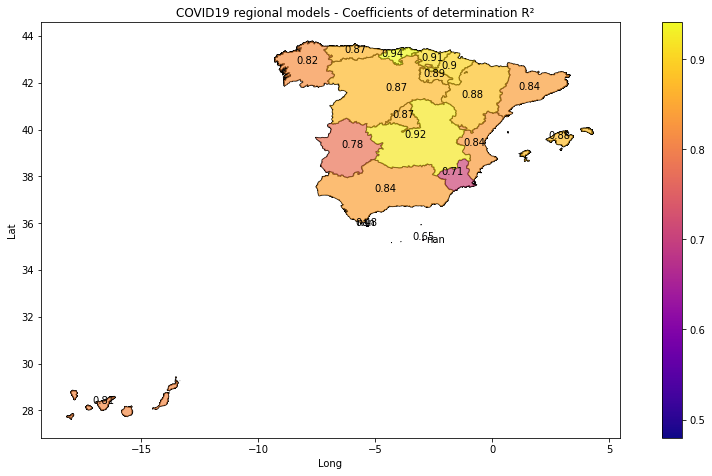

In [45]:
#Mapping models' performance
#importing mapping libraries
import geopandas as gpd
import os
#opening shapefile
url = "https://github.com/raulgm18/geodata/raw/master/CCAA.geojson"
df = gpd.read_file(url)
#joining model outputs to the shapefile
df = pd.merge(left=df, right=model_outputs_df, how='left', left_on='INE_CCAA', right_on='COD_REG')
#map settings
fig, ax = plt.subplots(figsize = (15,7))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional models - Coefficients of determination R²',fontsize = 12)
#leyend
df.plot(column = 'model_score', cmap = 'plasma', ax=ax, legend=True, alpha=0.7, zorder=3)
df.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1, ax=ax) 
#adding labels
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
for idx, row in df.iterrows():
    plt.annotate(s=str(round(row['model_score'],2)), xy=row['coords'],
                 horizontalalignment='center')
plt.savefig("COVID_model_scores_map.png")


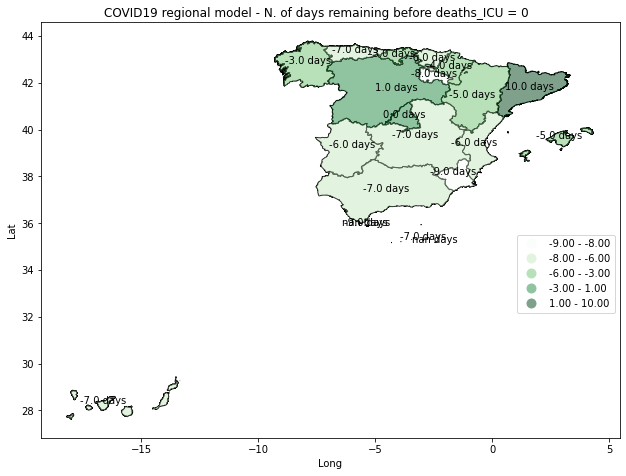

In [46]:
#Mapping models' predictions
#opening shapefile
url = "https://github.com/raulgm18/geodata/raw/master/CCAA.geojson"
df = gpd.read_file(url)
#joining model outputs to the shapefile
df = pd.merge(left=df, right=model_outputs_df, how='left', left_on='INE_CCAA', right_on='COD_REG')
#map settings
fig, ax = plt.subplots(figsize = (15,7))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional model - N. of days remaining before deaths_ICU = 0',fontsize = 12)
df.plot(column = 'remaining_days', cmap = 'Greens', ax=ax, legend=True, scheme='FisherJenks', alpha=0.5, zorder=3)
df.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1, ax=ax)
# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.5))

#adding labels
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
for idx, row in df.iterrows():
    plt.annotate(s=str(row['remaining_days']) + " days", xy=row['coords'],
                 horizontalalignment='center')
plt.savefig("COVID_regional_models_map_nofilter.png")


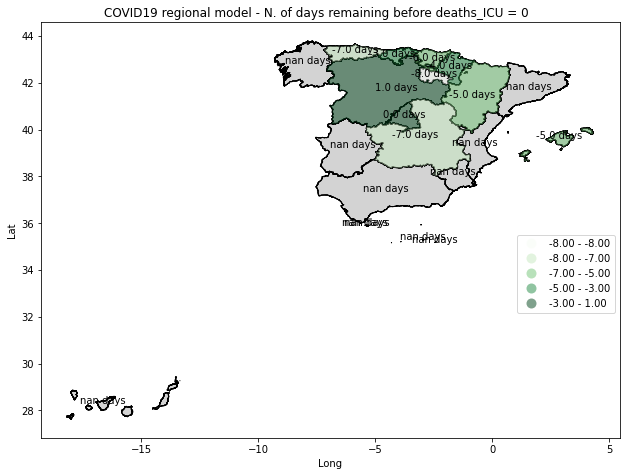

In [47]:
#Combining predictions with models reliability
#opening shapefile
url = "https://github.com/raulgm18/geodata/raw/master/CCAA.geojson"
df = gpd.read_file(url)
background = df
model_outputs_df_filtered = model_outputs_df[model_outputs_df['model_score'] > model_score_threshold]
#joining model outputs to the shapefile
df = pd.merge(left=df, right=model_outputs_df_filtered, how='left', left_on='INE_CCAA', right_on='COD_REG')
#map settings
fig, ax = plt.subplots(figsize = (15,7))
fig.subplots_adjust(top=0.95)
fig.suptitle('COVID19 regional model - N. of days remaining before deaths_ICU = 0',fontsize = 12)
df.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1, ax=ax) 
background.geometry.boundary.plot(color=None, edgecolor='k', linewidth = 1, ax=ax) 
background.plot(color='lightgray', edgecolor='k', linewidth = 1, ax=ax, legend=True) 
df.plot(column = 'remaining_days', cmap = 'Greens', ax=ax, legend=True, scheme='FisherJenks', alpha=0.5, zorder=3)
# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.5))

#adding labels
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
for idx, row in df.iterrows():
    plt.annotate(s=str(row['remaining_days']) + " days", xy=row['coords'],
                 horizontalalignment='center')
plt.savefig("COVID_regional_models_map.png")


In [48]:
#Cleaning output table and saving csv
export_table = model_outputs_df.copy()
export_table.loc[export_table['model_score'] < model_score_threshold, 'remaining_days'] = 'No Data'
export_table.loc[export_table['model_score'] < model_score_threshold, 'date_zero_min'] = 'No Data'
export_table.loc[export_table['model_score'] < model_score_threshold, 'date_zero_max'] = 'No Data'
export_table.loc[export_table['model_score'] < model_score_threshold, 'date_zero'] = 'No Data'
export_table.sort_index(inplace=True)
del export_table['COD_REG']
print(export_table)
export_table.to_csv('export_table_%s%02d%s.csv' % (today.year, today.month, today.day))


                    region_name remaining_days  ... date_zero_min model_score
1                     Andalucía        No Data  ...       No Data    0.843856
2                        Aragón             -5  ...    29/04/2020    0.882931
3       Asturias, Principado de             -7  ...    29/04/2020    0.868277
4                Balears, Illes             -5  ...    20/04/2020    0.875306
5                      Canarias        No Data  ...       No Data    0.812202
6                     Cantabria             -3  ...    01/05/2020    0.941517
7               Castilla y León              1  ...    02/05/2020    0.871862
8          Castilla - La Mancha             -7  ...    01/05/2020    0.922987
9                      Cataluña        No Data  ...       No Data    0.837149
10         Comunitat Valenciana        No Data  ...       No Data    0.835098
11                  Extremadura        No Data  ...       No Data    0.780588
12                      Galicia        No Data  ...       No Dat